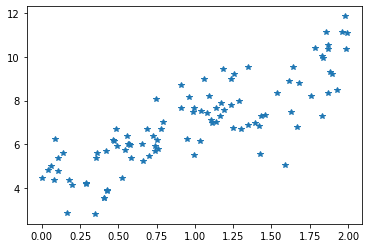

In [16]:
# 线性回归

# 随机生成一百个点
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
plt.plot(X,y,'*')
plt.show()

In [3]:
# 使用scikit- learn执行线性回归
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.84027182]), array([[2.97034851]]))

In [4]:
x_new=np.array([[0],[2]])
lin_reg.predict(x_new)

array([[3.84027182],
       [9.78096883]])

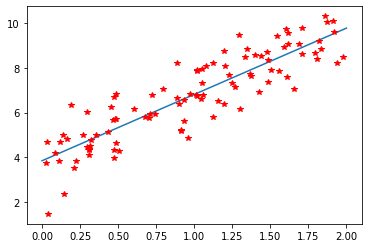

In [5]:
plt.plot(x_new,lin_reg.predict(x_new))
plt.plot(X,y,'r*')

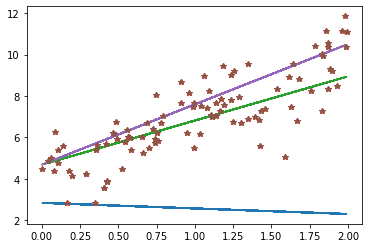

In [27]:
X_b=np.c_[np.ones((100,1)),X]
# 使用梯度下降GD，batch gradient decent批量梯度下降
etas=[0.01,0.1,0.5] # 学习率
n_iterations=5
m=100

theta=np.random.randn(2,1) # 随机初始化参数
for eta in etas:
    for iteration in range(n_iterations):
        gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta=theta-eta*gradients
    y_predict=X_b.dot(theta)
    plt.plot(X,y_predict)
    plt.plot(X,y,'*')


In [34]:
# 利用交叉验证了解分类模型的参数
# 另外一种方法是观察学习曲线

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',label='train')
    plt.plot(np.sqrt(val_errors),'b+',label='val')

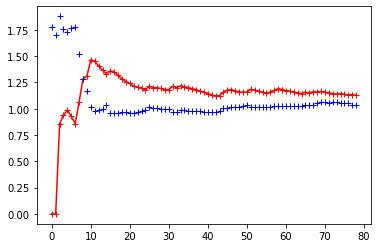

In [35]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pass

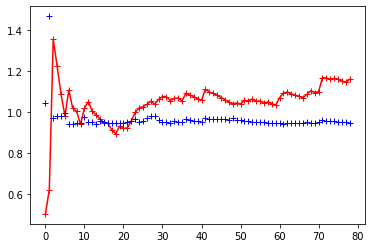

In [37]:
## L1 正则化 Lasso回归,倾向于使用更少的特征
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty='l1')
plot_learning_curves(sgd_reg,X,y)



/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


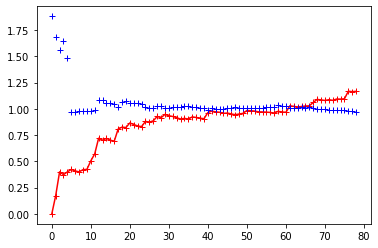

In [39]:

## 弹性网络from sklearn.linear_model import ElasticNet
el_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
plot_learning_curves(el_net,X,y)

/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pass

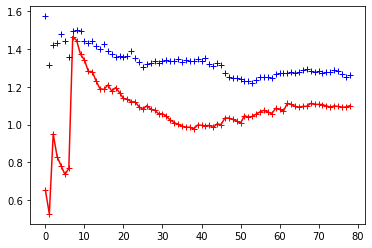

In [40]:
## L2 正则化 Tikhonov回归
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty='l2')
plot_learning_curves(sgd_reg,X,y)

In [ ]:
## early stopping zaoting ,在最小值的时候停止训练